## Breast Cancer Dataset Modeling Methods

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from catboost import CatBoostClassifier
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
ds = load_breast_cancer()

In [6]:
ds['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
data = pd.DataFrame(ds['data'], columns=ds['feature_names'])
target = pd.DataFrame(ds['target'], columns=['class'])

In [8]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
data.describe(include='all')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [12]:
data.skew()

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

In [13]:
data.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


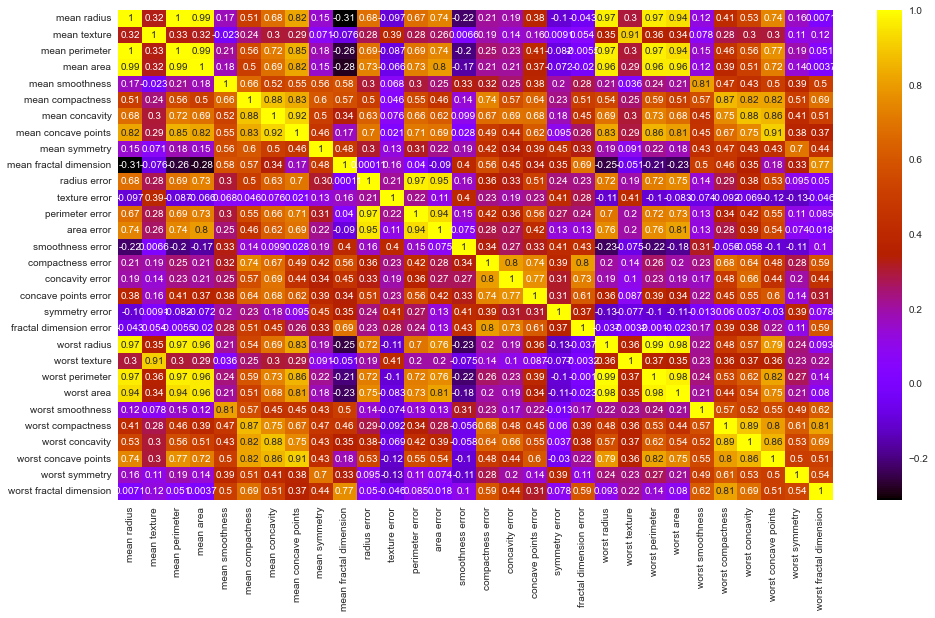

In [21]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(data.corr(),annot = True,cmap = 'gnuplot')
plt.show()

In [24]:
target.value_counts()

class
1        357
0        212
dtype: int64

### Outliers

In [28]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)

global a
a = []
for i in data.columns:
    count_outliers(data,i)

There are outliers in mean radius
Count of outliers are: 14
There are outliers in mean texture
Count of outliers are: 7
There are outliers in mean perimeter
Count of outliers are: 13
There are outliers in mean area
Count of outliers are: 25
There are outliers in mean smoothness
Count of outliers are: 6
There are outliers in mean compactness
Count of outliers are: 16
There are outliers in mean concavity
Count of outliers are: 18
There are outliers in mean concave points
Count of outliers are: 10
There are outliers in mean symmetry
Count of outliers are: 15
There are outliers in mean fractal dimension
Count of outliers are: 15
There are outliers in radius error
Count of outliers are: 38
There are outliers in texture error
Count of outliers are: 20
There are outliers in perimeter error
Count of outliers are: 38
There are outliers in area error
Count of outliers are: 65
There are outliers in smoothness error
Count of outliers are: 30
There are outliers in compactness error
Count of outlier

In [74]:
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)
target = pd.DataFrame(target, columns=['diagnosis'])

### Feature Scaling

In [75]:
scaler = StandardScaler()
scaled_features = scaler.fit(data)
scaled_features = scaler.transform(data)
scaled_df = pd.DataFrame(scaled_features,columns = data.columns)
scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Train Test Split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(data, target, shuffle=True)

# Statistical Modelling

## Logistic Regression

In [85]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(x_train,y_train)
y_pred = log_reg.predict(x_test)

In [86]:
print("\n***Confusion Matrix*** \n",confusion_matrix(y_test,y_pred))
print("\n***Classification Report***\n", classification_report(y_test,y_pred))
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred)*100,4)} %")
print(f"Score: {round(log_reg.score(x_test, y_test)*100,4)} %")


***Confusion Matrix*** 
 [[44  8]
 [ 2 89]]

***Classification Report***
               precision    recall  f1-score   support

           0       0.96      0.85      0.90        52
           1       0.92      0.98      0.95        91

    accuracy                           0.93       143
   macro avg       0.94      0.91      0.92       143
weighted avg       0.93      0.93      0.93       143

Accuracy: 93.007 %
Score: 93.007 %


## Naive Bayes Classifier

In [132]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)

In [133]:
print("\n***Confusion Matrix*** \n",confusion_matrix(y_test,y_pred))
print("\n***Classification Report***\n", classification_report(y_test,y_pred))
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred)*100,4)} %")


***Confusion Matrix*** 
 [[45  7]
 [ 3 88]]

***Classification Report***
               precision    recall  f1-score   support

           0       0.94      0.87      0.90        52
           1       0.93      0.97      0.95        91

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143

Accuracy: 93.007 %


## Random Forest Classifier

In [134]:
# Random Forest Classifier
rf = RandomForestClassifier()
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(rf, grid_params, cv = 10, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 512 candidates, totalling 5120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 5120 out of 5120 | elapsed:  5.3min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [135]:
# Display best parameters
print("Best Parameters: ", grid_search.best_estimator_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  RandomForestClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=6)
Best Score:  0.9578073089700997


In [136]:
# Random Forest Modelling:
rf = RandomForestClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=6)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [137]:
print("\n***Confusion Matrix*** \n",confusion_matrix(y_test,y_pred))
print("\n***Classification Report***\n", classification_report(y_test,y_pred))
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred)*100,4)} %")


***Confusion Matrix*** 
 [[47  5]
 [ 1 90]]

***Classification Report***
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        52
           1       0.95      0.99      0.97        91

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

Accuracy: 95.8042 %


## Decision Tree

In [97]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [100]:
# Hyper-parameter Tuning
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dt, grid_params, cv = 10, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 512 candidates, totalling 5120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 5050 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 5120 out of 5120 | elapsed:   16.1s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [103]:
# Display best parameters and train model with it
print("Best Parameters: ", grid_search.best_estimator_)
print("Best Score: ", grid_search.best_score_)
dt_tuned = grid_search.best_estimator_
y_pred = dt_tuned.predict(x_test)

Best Parameters:  DecisionTreeClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=8)
Best Score:  0.9343300110741971


In [104]:
print("\n***Confusion Matrix*** \n",confusion_matrix(y_test,y_pred))
print("\n***Classification Report***\n", classification_report(y_test,y_pred))
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred)*100,4)} %")


***Confusion Matrix*** 
 [[46  6]
 [ 2 89]]

***Classification Report***
               precision    recall  f1-score   support

           0       0.96      0.88      0.92        52
           1       0.94      0.98      0.96        91

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143

Accuracy: 94.4056 %


## ADA Boost Classifier

In [106]:
ada = AdaBoostClassifier(base_estimator=dt_tuned)
parameters = {
    'n_estimators' : [50, 70, 90, 120, 150, 180, 210, 250],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 10, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  4.1min finished


GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=7,
                                                                                min_samples_leaf=6,
                                                                                min_samples_split=8)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 150, 180, 210, 250]},
             verbose=1)

In [107]:
# Display best parameters
print("Best Parameters: ", grid_search.best_estimator_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=7,
                                                         min_samples_leaf=6,
                                                         min_samples_split=8),
                   learning_rate=0.1, n_estimators=150)
Best Score:  0.9718161683277963


In [108]:
# Train adaboost with best parameters
ada = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 0.1, n_estimators = 150,
                        base_estimator=DecisionTreeClassifier(max_depth=7,
                                                         min_samples_leaf=6,
                                                         min_samples_split=8))
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)

In [109]:
print("\n***Confusion Matrix*** \n",confusion_matrix(y_test,y_pred))
print("\n***Classification Report***\n", classification_report(y_test,y_pred))
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred)*100,4)} %")


***Confusion Matrix*** 
 [[49  3]
 [ 0 91]]

***Classification Report***
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        52
           1       0.97      1.00      0.98        91

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143

Accuracy: 97.9021 %


## Support Vector Machines (SVM)

In [91]:
svm = SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)

In [93]:
print("\n***Confusion Matrix*** \n",confusion_matrix(y_test,y_pred))
print("\n***Classification Report***\n", classification_report(y_test,y_pred))
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred)*100,4)} %")


***Confusion Matrix*** 
 [[36 16]
 [ 2 89]]

***Classification Report***
               precision    recall  f1-score   support

           0       0.95      0.69      0.80        52
           1       0.85      0.98      0.91        91

    accuracy                           0.87       143
   macro avg       0.90      0.84      0.85       143
weighted avg       0.88      0.87      0.87       143

Accuracy: 87.4126 %


## k-Nearest Neighbour

In [43]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred_i = knn.predict(x_test)
    error_rate.append(np.mean(y_pred_i != y_test))

Text(0, 0.5, 'Error Rate')

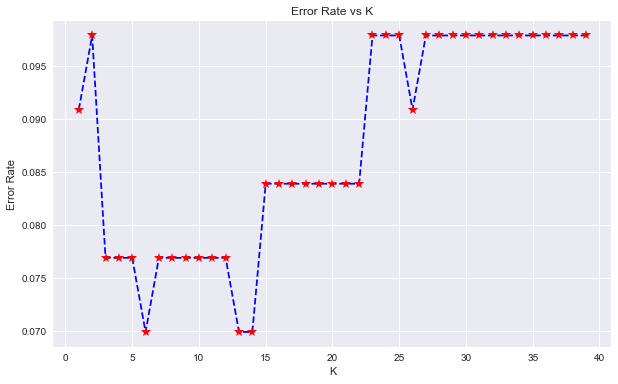

In [44]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = '*',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [52]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [53]:
print("\n***Confusion Matrix*** \n",confusion_matrix(y_test,y_pred))
print("\n***Classification Report***\n", classification_report(y_test,y_pred))
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred)*100,4)} %")


***Confusion Matrix*** 
 [[54  4]
 [ 6 79]]

***Classification Report***
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        58
           1       0.95      0.93      0.94        85

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143

Accuracy: 93.007 %


## Gradient Boosting Classifier

In [111]:
gbc = GradientBoostingClassifier()
parameters = {
    'n_estimators' : [50, 100, 150, 180, 210, 250],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'loss': ['deviance', 'exponential']
}

grid_search = GridSearchCV(gbc, parameters, n_jobs = -1, cv = 10, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.8min finished


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [50, 100, 150, 180, 210, 250]},
             verbose=1)

In [112]:
# Display best parameters
print("Best Parameters: ", grid_search.best_estimator_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  GradientBoostingClassifier(learning_rate=1, n_estimators=180)
Best Score:  0.9601882613510521


In [113]:
gbc_tuned = GradientBoostingClassifier(learning_rate=1, n_estimators=180)
gbc_tuned.fit(x_train,y_train)
y_pred = gbc_tuned.predict(x_test)

In [114]:
print("\n***Confusion Matrix*** \n",confusion_matrix(y_test,y_pred))
print("\n***Classification Report***\n", classification_report(y_test,y_pred))
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred)*100,4)} %")


***Confusion Matrix*** 
 [[47  5]
 [ 0 91]]

***Classification Report***
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        52
           1       0.95      1.00      0.97        91

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143

Accuracy: 96.5035 %


## Stochastic Gradient Boosting Classifier

In [115]:
sgbc = GradientBoostingClassifier(learning_rate = 1, subsample = 0.9, 
                                  max_features = 0.75, loss = 'deviance',
                                  n_estimators = 100)
sgbc.fit(x_train, y_train)
y_pred = sgbc.predict(x_test)

In [116]:
print("\n***Confusion Matrix*** \n",confusion_matrix(y_test,y_pred))
print("\n***Classification Report***\n", classification_report(y_test,y_pred))
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred)*100,4)} %")


***Confusion Matrix*** 
 [[47  5]
 [ 0 91]]

***Classification Report***
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        52
           1       0.95      1.00      0.97        91

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143

Accuracy: 96.5035 %


## Cat Boost Classifier

In [118]:
cat = CatBoostClassifier()
parameters = {
    'iterations' : [50, 100, 150, 180, 210, 250],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'depth': [3, 5, 7, 9]
}cat = CatBoostClassifier()
parameters = {
    'iterations' : [50, 100, 150, 180, 210, 250],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'depth': [3, 5, 7, 9]
}

grid_search = GridSearchCV(cat, parameters, n_jobs = -1, cv = 10, verbose = 1)
grid_search.fit(x_train, y_train)

grid_search = GridSearchCV(cat, parameters, n_jobs = -1, cv = 10, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 41.3min finished


0:	learn: 0.1330605	total: 157ms	remaining: 15.5s
1:	learn: 0.0832998	total: 163ms	remaining: 8s
2:	learn: 0.0655933	total: 169ms	remaining: 5.46s
3:	learn: 0.0443470	total: 174ms	remaining: 4.18s
4:	learn: 0.0255937	total: 179ms	remaining: 3.41s
5:	learn: 0.0179439	total: 186ms	remaining: 2.91s
6:	learn: 0.0168101	total: 193ms	remaining: 2.57s
7:	learn: 0.0142375	total: 200ms	remaining: 2.3s
8:	learn: 0.0114016	total: 207ms	remaining: 2.09s
9:	learn: 0.0084888	total: 214ms	remaining: 1.92s
10:	learn: 0.0074754	total: 221ms	remaining: 1.79s
11:	learn: 0.0069313	total: 229ms	remaining: 1.68s
12:	learn: 0.0059952	total: 237ms	remaining: 1.59s
13:	learn: 0.0059948	total: 244ms	remaining: 1.5s
14:	learn: 0.0050755	total: 251ms	remaining: 1.42s
15:	learn: 0.0044003	total: 258ms	remaining: 1.35s
16:	learn: 0.0038052	total: 265ms	remaining: 1.3s
17:	learn: 0.0034648	total: 272ms	remaining: 1.24s
18:	learn: 0.0031935	total: 279ms	remaining: 1.19s
19:	learn: 0.0030143	total: 286ms	remaining: 1.

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000022D2C5B3208>,
             n_jobs=-1,
             param_grid={'depth': [3, 5, 7, 9],
                         'iterations': [50, 100, 150, 180, 210, 250],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10]},
             verbose=1)

In [121]:
# Display best parameters
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'depth': 5, 'iterations': 100, 'learning_rate': 1}
Best Score:  0.9696013289036545


In [122]:
cat_tuned = CatBoostClassifier(depth=5, iterations = 180, learning_rate = 1)
cat_tuned.fit(x_train, y_train)
y_pred = cat_tuned.predict(x_test)

0:	learn: 0.1330605	total: 12.3ms	remaining: 2.2s
1:	learn: 0.0832998	total: 25.3ms	remaining: 2.25s
2:	learn: 0.0655933	total: 33.1ms	remaining: 1.95s
3:	learn: 0.0443470	total: 43.5ms	remaining: 1.91s
4:	learn: 0.0255937	total: 55ms	remaining: 1.93s
5:	learn: 0.0179439	total: 64.9ms	remaining: 1.88s
6:	learn: 0.0168101	total: 75.6ms	remaining: 1.87s
7:	learn: 0.0142375	total: 86.1ms	remaining: 1.85s
8:	learn: 0.0114016	total: 94.5ms	remaining: 1.79s
9:	learn: 0.0084888	total: 110ms	remaining: 1.86s
10:	learn: 0.0074754	total: 123ms	remaining: 1.89s
11:	learn: 0.0069313	total: 134ms	remaining: 1.87s
12:	learn: 0.0059952	total: 144ms	remaining: 1.84s
13:	learn: 0.0059948	total: 154ms	remaining: 1.83s
14:	learn: 0.0050755	total: 162ms	remaining: 1.79s
15:	learn: 0.0044003	total: 173ms	remaining: 1.78s
16:	learn: 0.0038052	total: 182ms	remaining: 1.75s
17:	learn: 0.0034648	total: 189ms	remaining: 1.7s
18:	learn: 0.0031935	total: 195ms	remaining: 1.66s
19:	learn: 0.0030143	total: 206ms	re

173:	learn: 0.0013380	total: 1.68s	remaining: 58ms
174:	learn: 0.0013377	total: 1.69s	remaining: 48.3ms
175:	learn: 0.0013375	total: 1.7s	remaining: 38.7ms
176:	learn: 0.0013372	total: 1.72s	remaining: 29.1ms
177:	learn: 0.0012844	total: 1.73s	remaining: 19.5ms
178:	learn: 0.0012844	total: 1.75s	remaining: 9.76ms
179:	learn: 0.0012842	total: 1.76s	remaining: 0us


In [123]:
print("\n***Confusion Matrix*** \n",confusion_matrix(y_test,y_pred))
print("\n***Classification Report***\n", classification_report(y_test,y_pred))
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred)*100,4)} %")


***Confusion Matrix*** 
 [[47  5]
 [ 1 90]]

***Classification Report***
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        52
           1       0.95      0.99      0.97        91

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

Accuracy: 95.8042 %


## XG Boost Classifier

In [126]:
xgb = XGBClassifier()
parameters = {
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'iterations' : [50, 100, 150, 180, 210, 250],
    'booster': ['gblinear', 'gbtree']
}

    
grid_search = GridSearchCV(xgb, parameters, n_jobs = -1, cv = 10, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   15.9s


[08:38:37] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:576: 
Parameters: { "iterations" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:38:37] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   28.5s finished


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weigh

In [127]:
# Display best parameters
print("Best Parameters: ", grid_search.best_estimator_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=-1,
              importance_type=None, interaction_constraints=None, iterations=50,
              learning_rate=1, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=8, num_parallel_tree=None,
              predictor=None, random_state=0, reg_alpha=0, reg_lambda=0,
              scale_pos_weight=1, subsample=None, tree_method=None,
              validate_parameters=1, verbosity=None)
Best Score:  0.9672203765227021


In [129]:
xgb_tuned = XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=-1,
              importance_type=None, interaction_constraints=None,
              iterations=50, learning_rate=1, max_delta_step=None,
              max_depth=None, min_child_weight=None, 
              monotone_constraints=None, n_estimators=100, n_jobs=8,
              num_parallel_tree=None, predictor=None, random_state=0,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=None,
              tree_method=None, validate_parameters=1, verbosity=None)
xgb_tuned.fit(x_train, y_train)
y_pred = xgb_tuned.predict(x_test)

[08:45:10] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:576: 
Parameters: { "iterations" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:45:10] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [130]:
print("\n***Confusion Matrix*** \n",confusion_matrix(y_test,y_pred))
print("\n***Classification Report***\n", classification_report(y_test,y_pred))
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred)*100,4)} %")


***Confusion Matrix*** 
 [[ 0 52]
 [ 0 91]]

***Classification Report***
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.64      1.00      0.78        91

    accuracy                           0.64       143
   macro avg       0.32      0.50      0.39       143
weighted avg       0.40      0.64      0.49       143

Accuracy: 63.6364 %
